In [1]:
import sys, os
project_root = os.path.abspath(os.path.join(os.getcwd(), "../../"))  # You are currently in "/Jupyter" folder
src_path = os.path.join(project_root, "src")
if src_path not in sys.path:
    sys.path.append(src_path)

from JsonMidiCreator import *

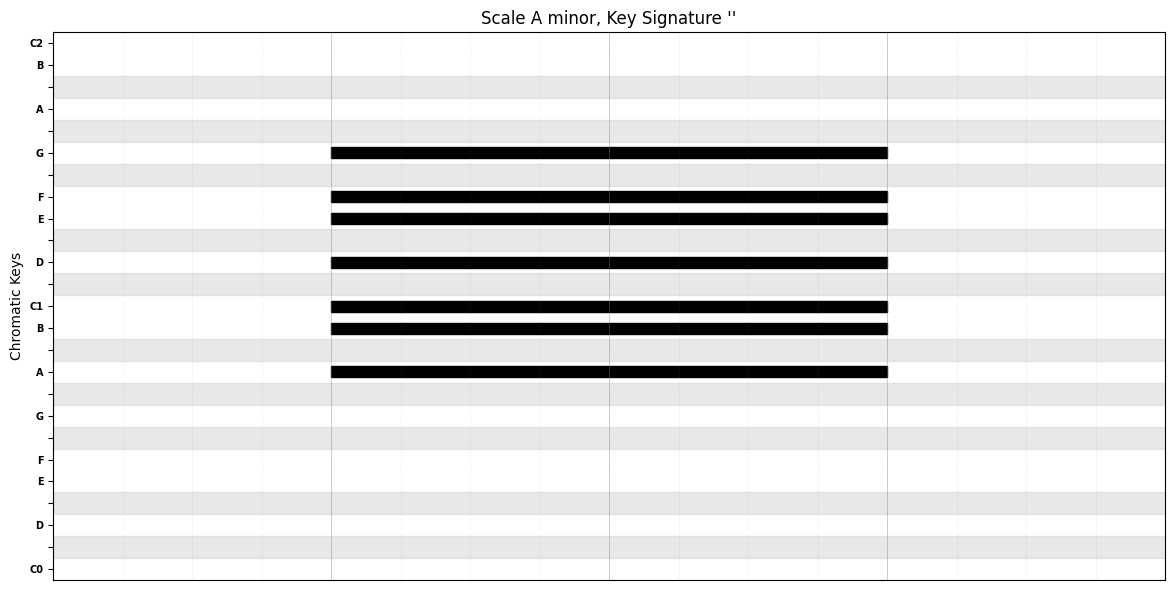

In [2]:
settings << Tempo(50) << Minor()   # Minor will mean the A as the default Tonic Key !
settings % KeySignature() >> Plot()

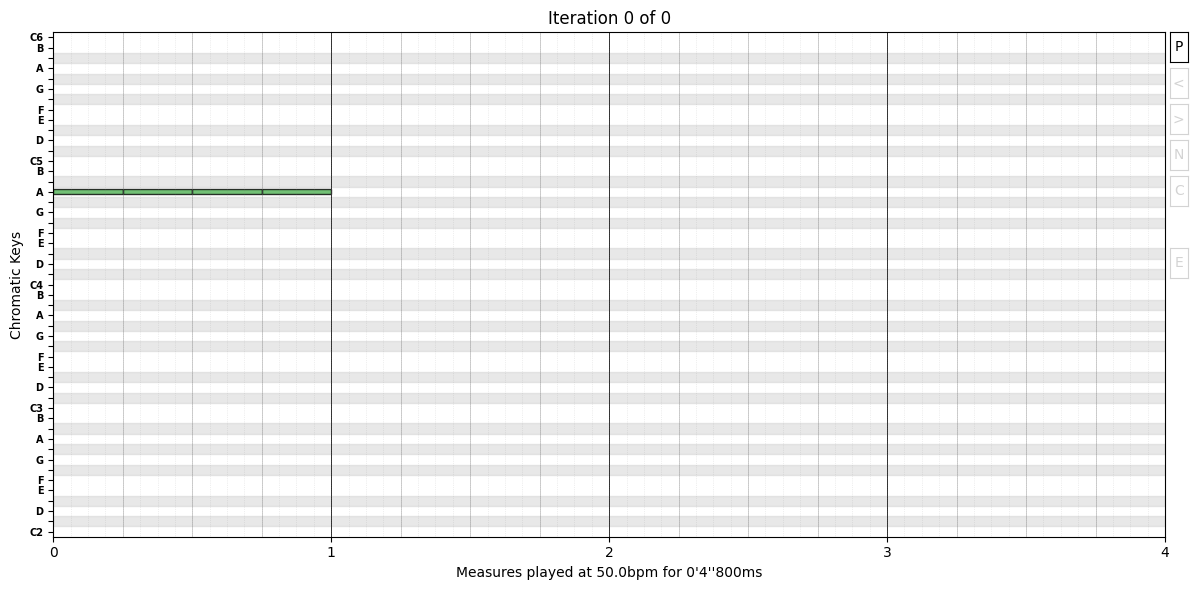

In [3]:
treble_melody = Note() / 4
treble_melody >> Plot()

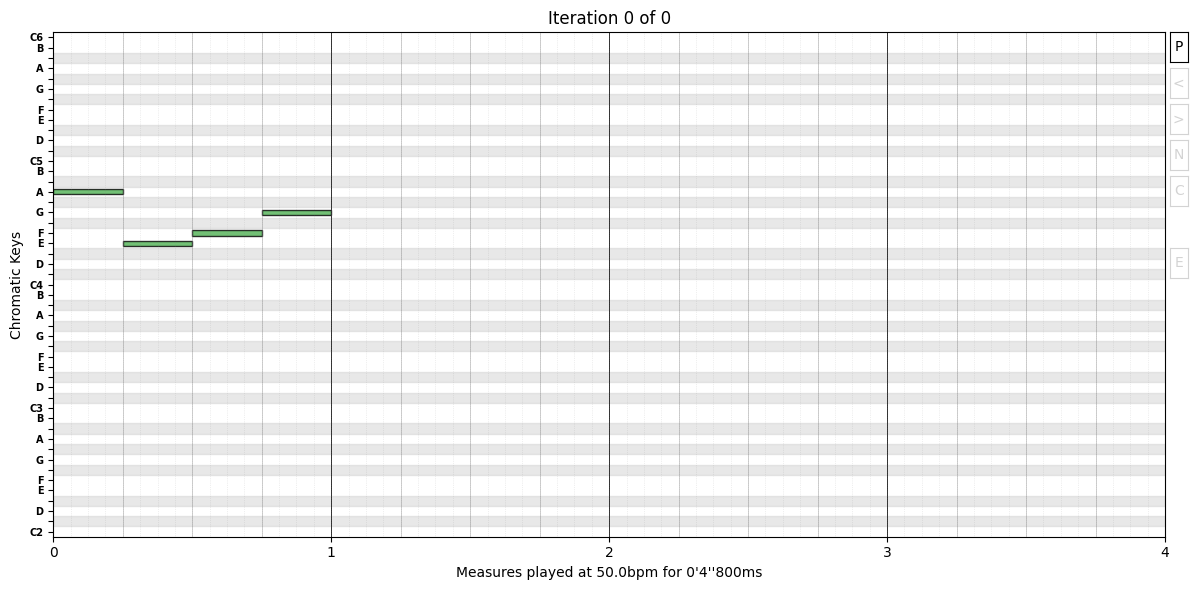

In [4]:
# Sets the Root Note for each Beat
treble_melody << Foreach("A", "E", "F", "G")**RootKey()
treble_melody >> Plot()

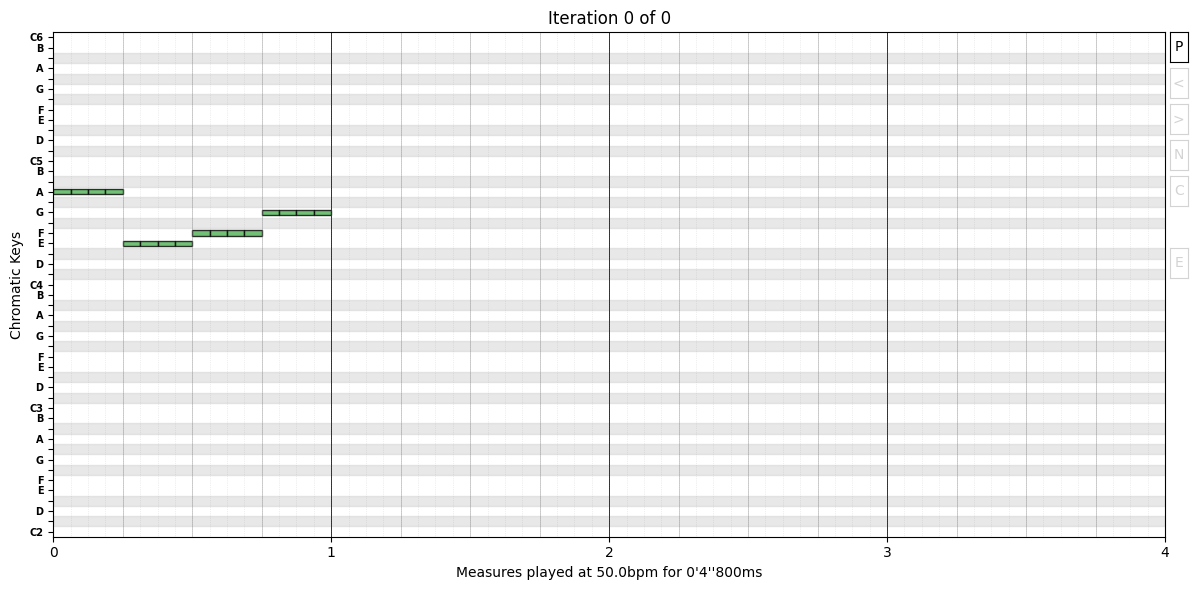

In [5]:
# Splits all notes by a duration of a single Step, equal to 1/4 of a Beat by default
treble_melody //= Steps(1)
treble_melody >> Plot()

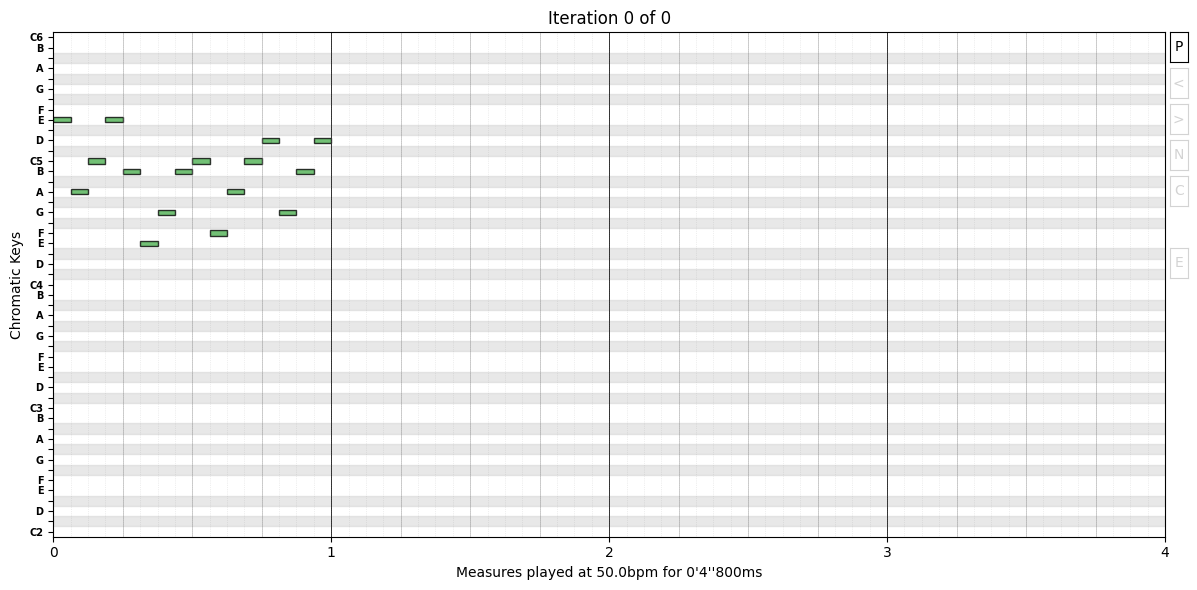

In [6]:
# Offsets the notes up the respective Degrees by multiples of 2
treble_melody += Foreach(2, 0, 1, 2)**Multiply(2)**Degree()
treble_melody >> Plot()

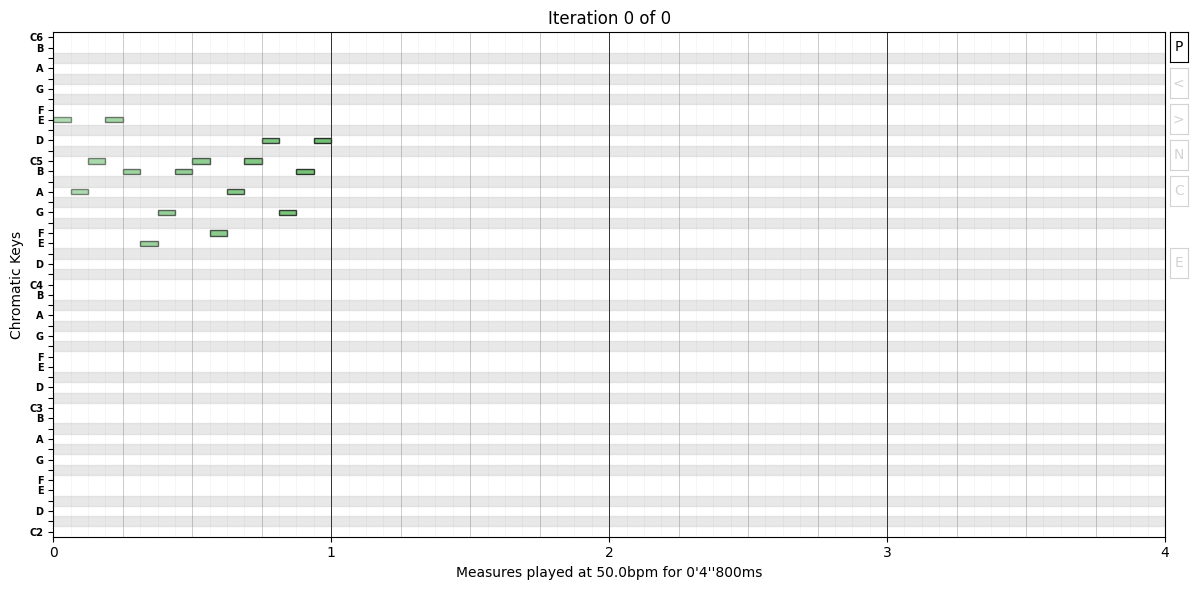

In [7]:
# Setting a Crescendo based on Step Position
treble_melody << Get(Step())**Multiply(3)**Add(55)**Velocity()
treble_melody >> Plot()

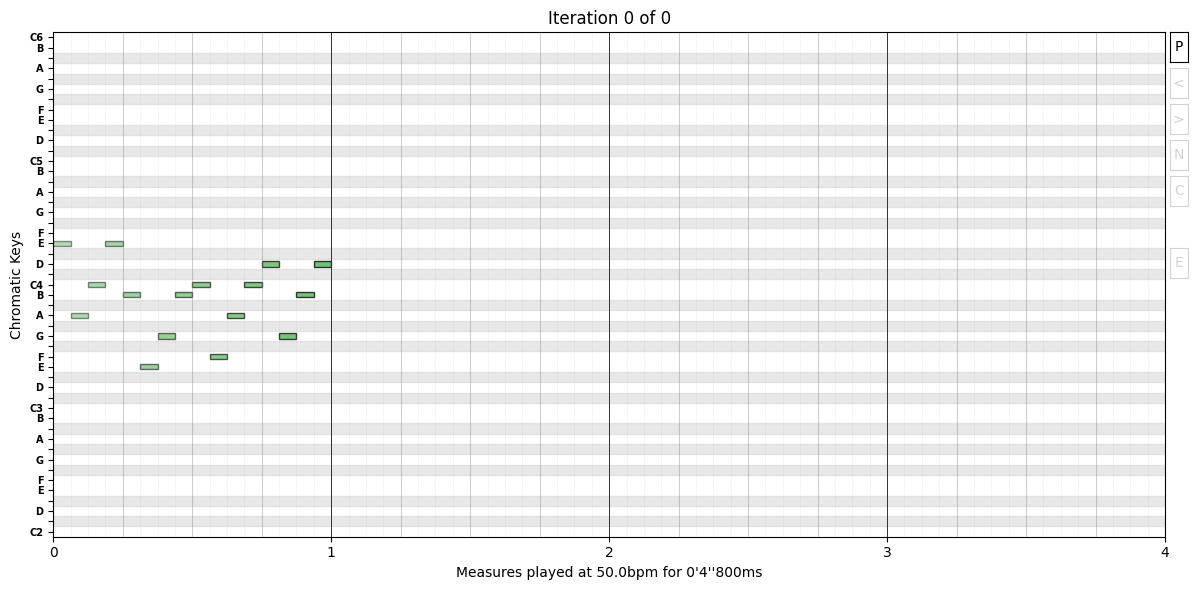

In [8]:
# Basic operations reult in implicit copies from left and right operands
bass_melody = treble_melody - Octave(1)
bass_melody >> Plot()

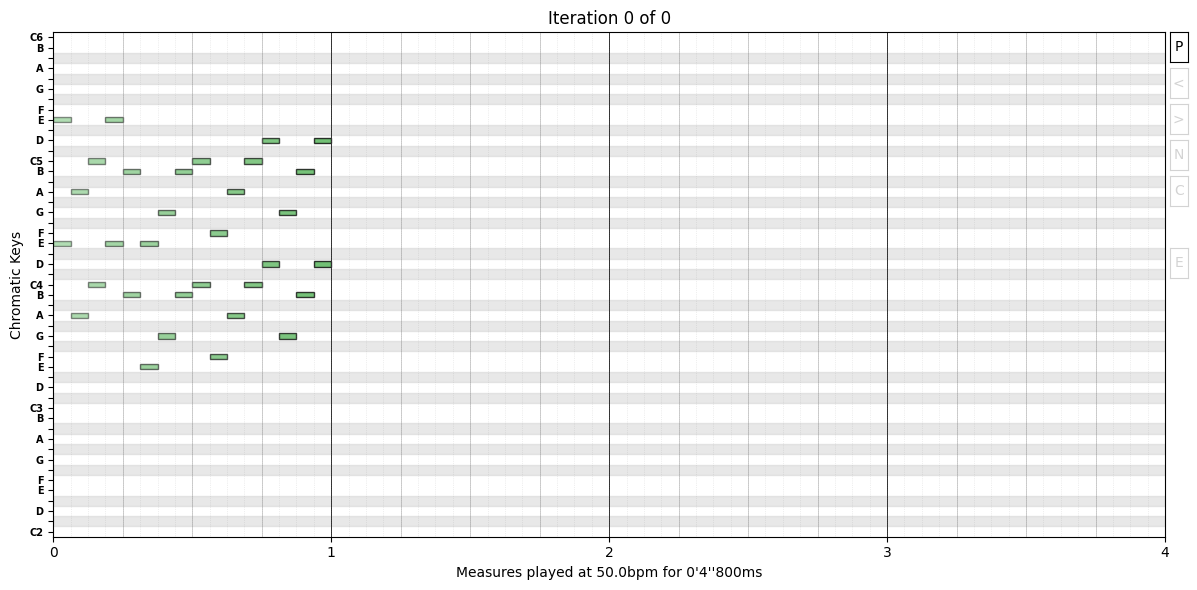

In [9]:
first_melody = treble_melody + bass_melody
first_melody >> Plot()

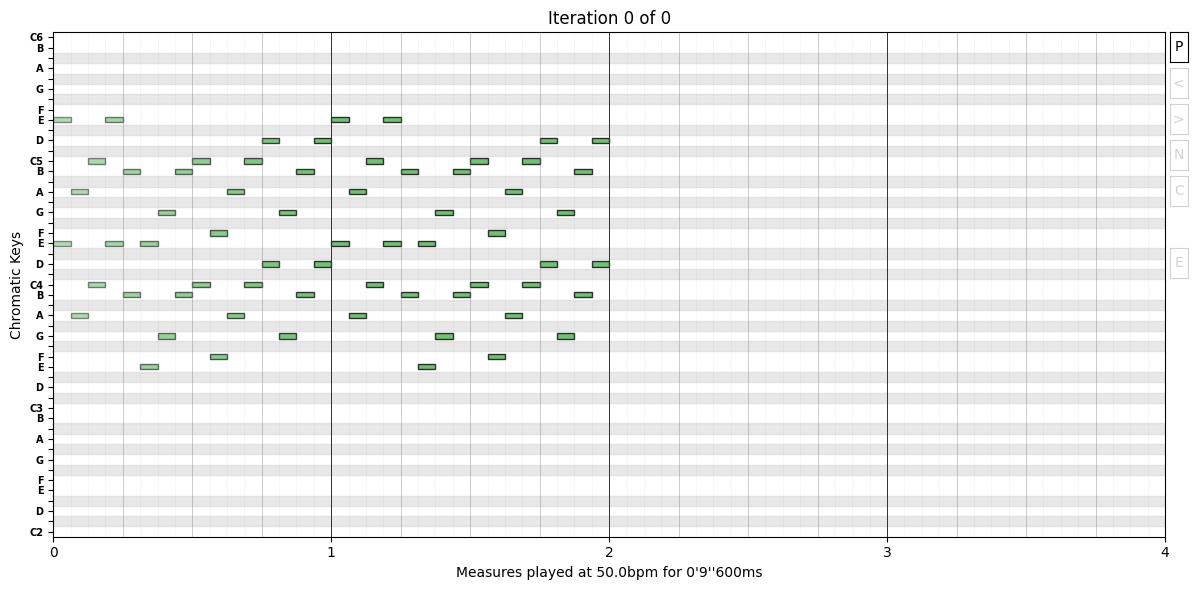

In [10]:
# Inline operations, like `=*`, preserve the left operand and do not result in any copy, except for the right operands
first_melody *= 2
first_melody << Equal(Measure(1))**Velocity( first_melody[Last()] )
first_melody >> Plot()

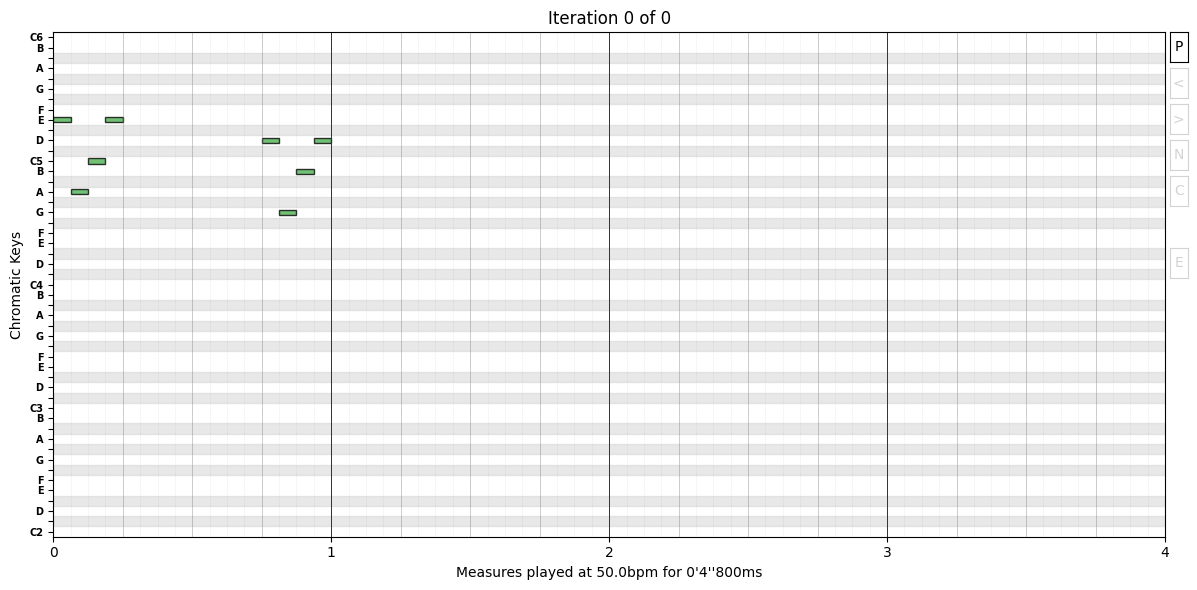

In [ ]:
outer_notes = treble_melody - treble_melody.mask(Or(Beat(1), Beat(2)))
outer_notes << Velocity( treble_melody.unmask()[Last()] ) >> Plot()

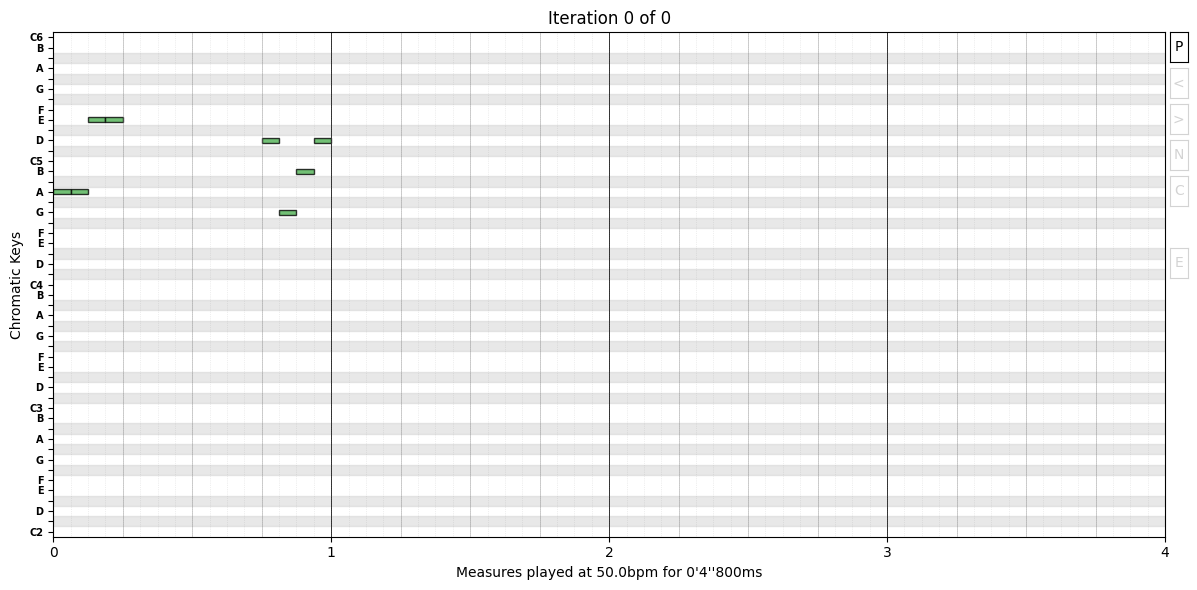

In [12]:
outer_notes << Mux(2)**Cycle("A", "E")**RootKey() << Mux(2)**Cycle(4, 5)**Octave()
outer_notes >> Plot()

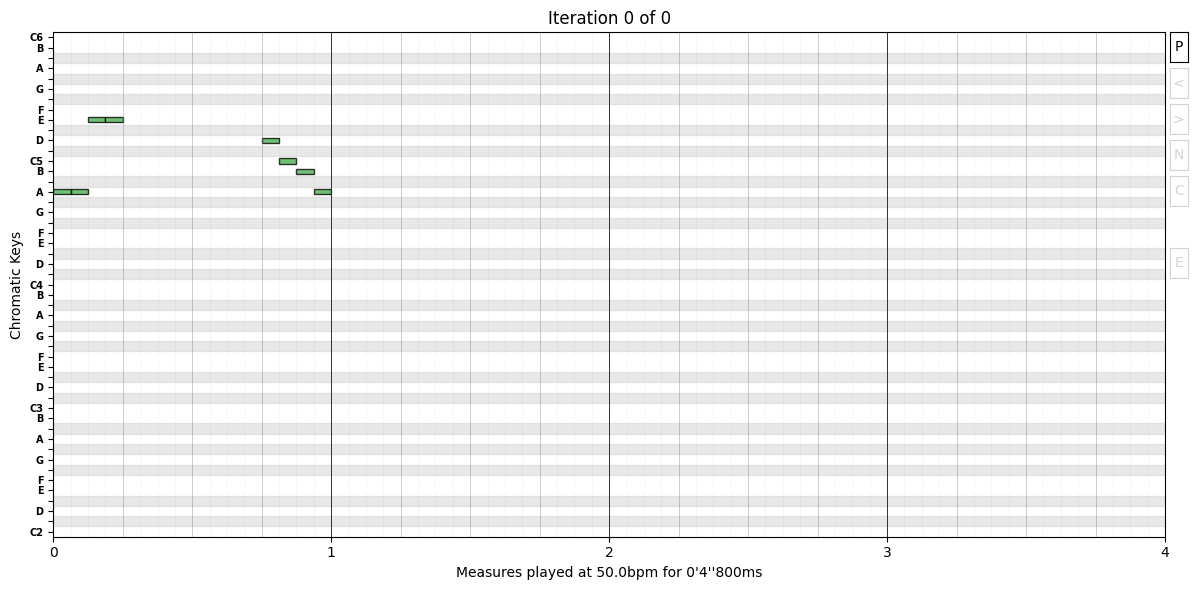

In [ ]:
outer_notes.mask(Beat(3)) << Previous()**Get(Pitch())**Subtract(1.0)
outer_notes.unmask() >> Plot()

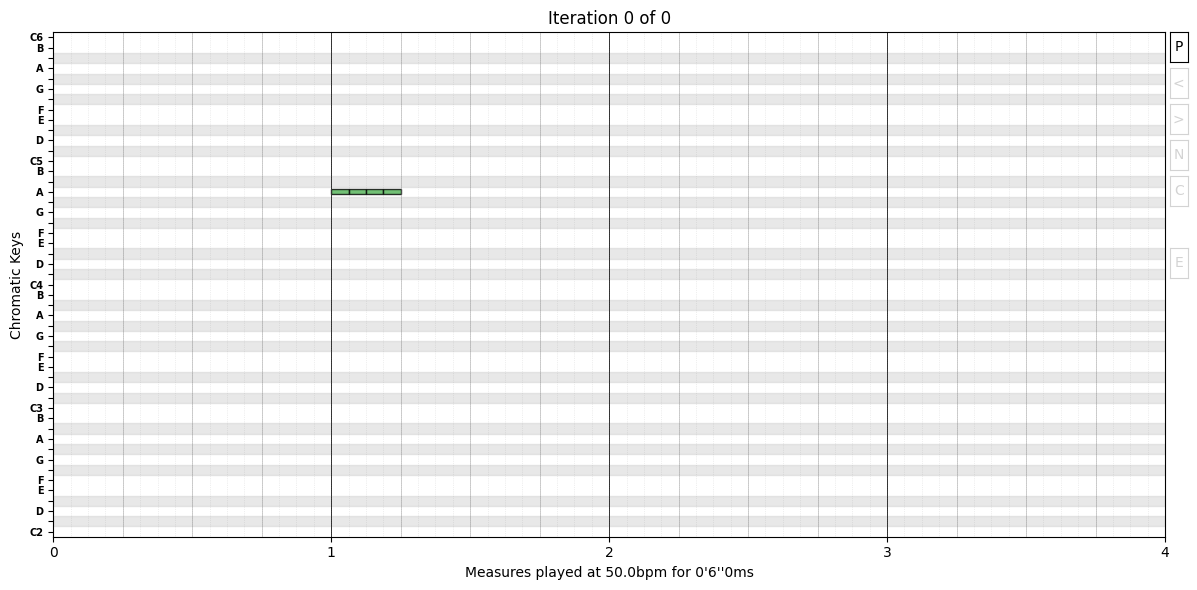

In [14]:
# This stack shall respect the Measure of the first `Element` (`Note`)
middle_notes = Note(Measure(1), 1/16) / 4
middle_notes >> Plot()

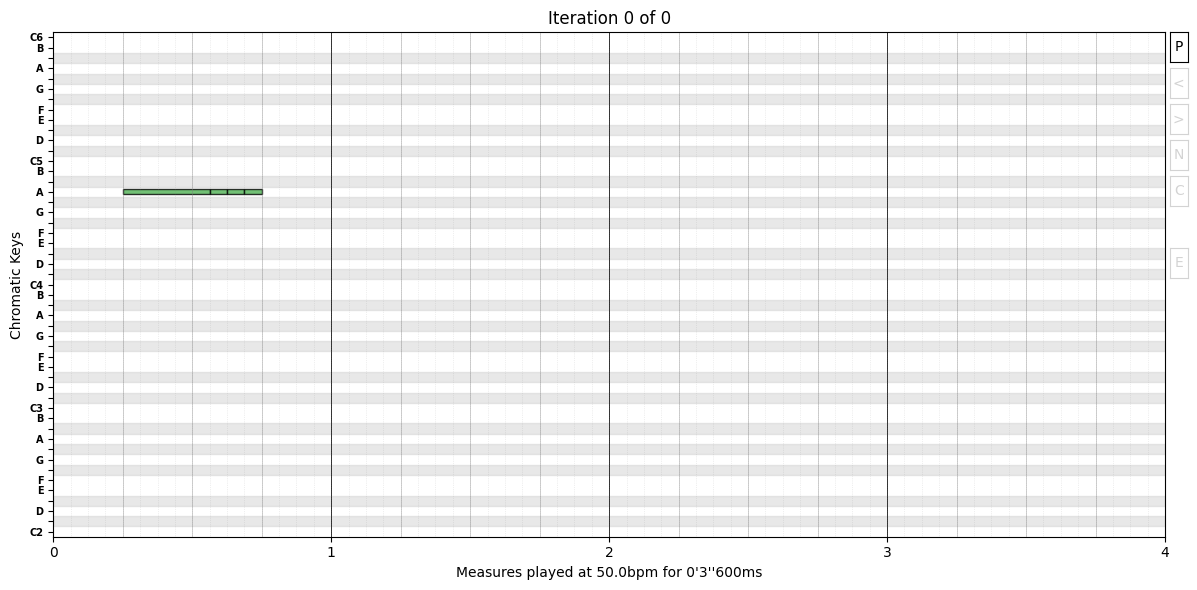

In [15]:
middle_notes << First()**(1/4 + 1/16) << Measure(0)
middle_notes >>= Stack()
middle_notes += Beat(1)
middle_notes >> Plot()

middle_notes 

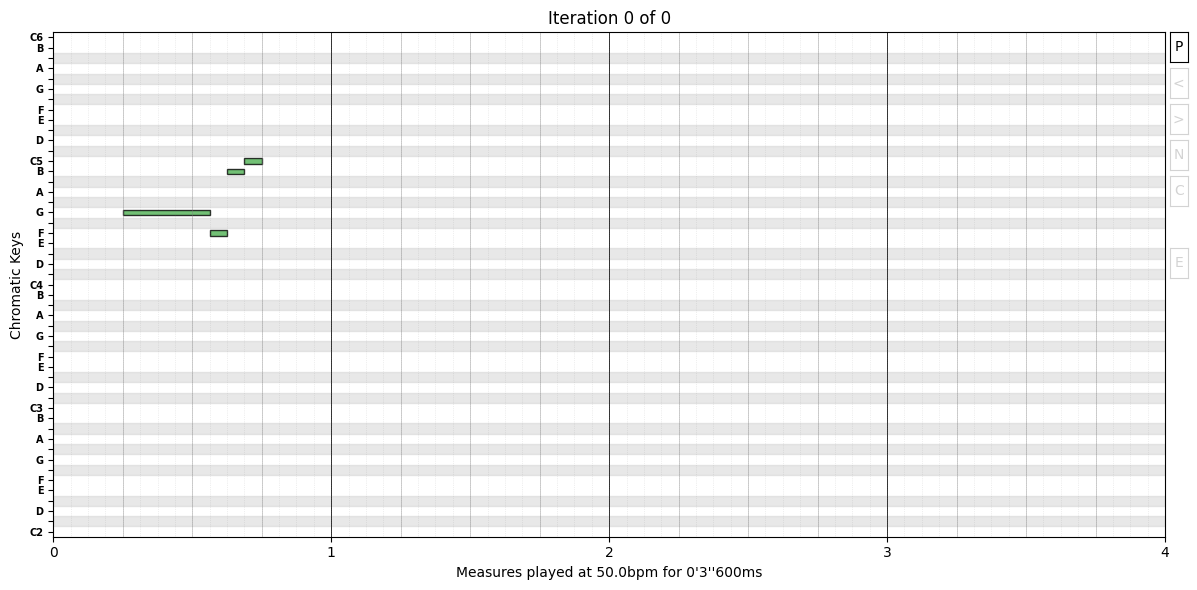

In [16]:
middle_notes += Foreach(-1, -2, +1, +2)**Degree()
middle_notes >> Plot()

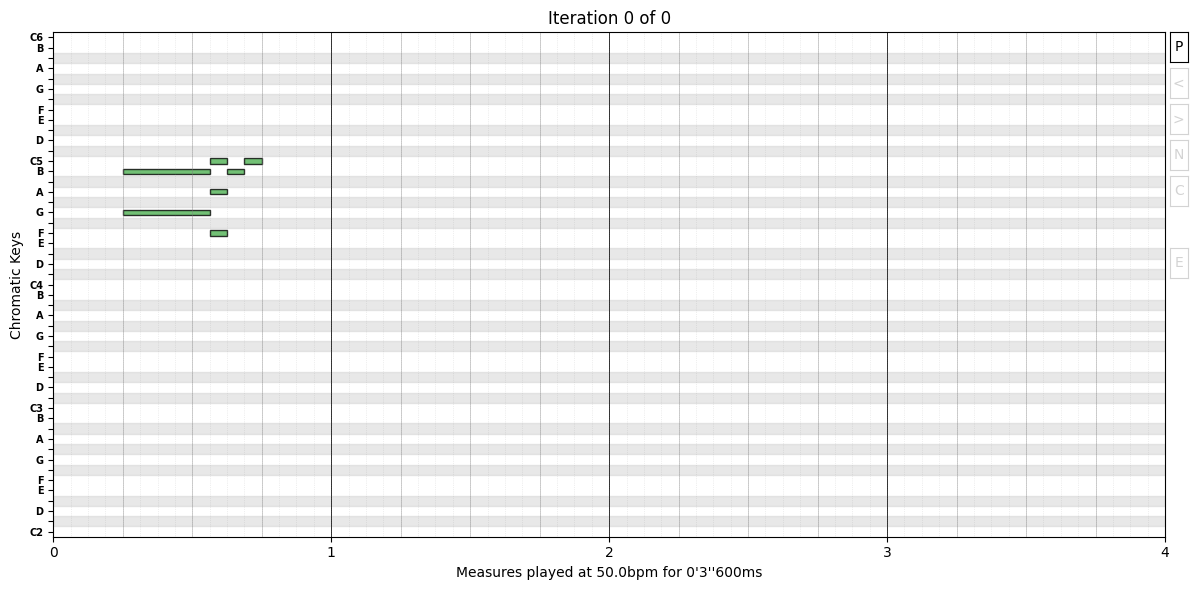

In [17]:
# You can stack Notes by pitch, the next operation results in multiple notes stacked on each other at the same Position
# However, it must cautiones, to consider the new notes added in the picking of the subsquent notes, in this case, the note
# in the 9th Step becames the 3rd note after the next first operation (Next we use the `>>` operator instead to do a wrap)
middle_notes[First()] /= [0, 2.0]
middle_notes[Nth(3)] /= [0, 2.0, 4.0]
middle_notes >> Plot()

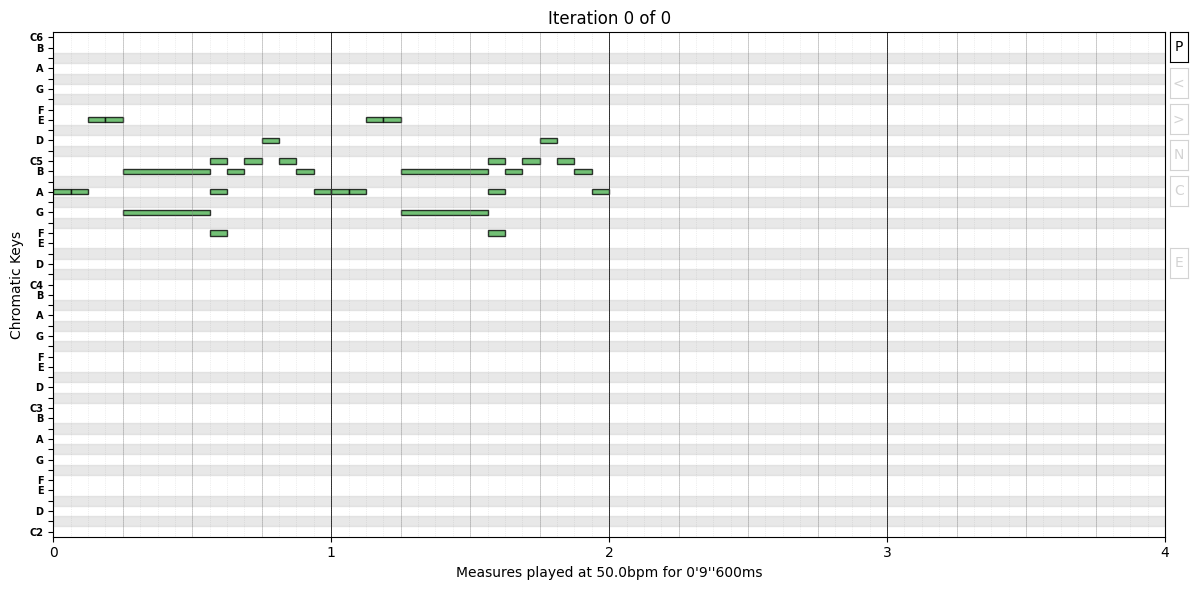

In [18]:
new_melody = outer_notes + middle_notes
new_melody *= 2
new_melody >> Plot()

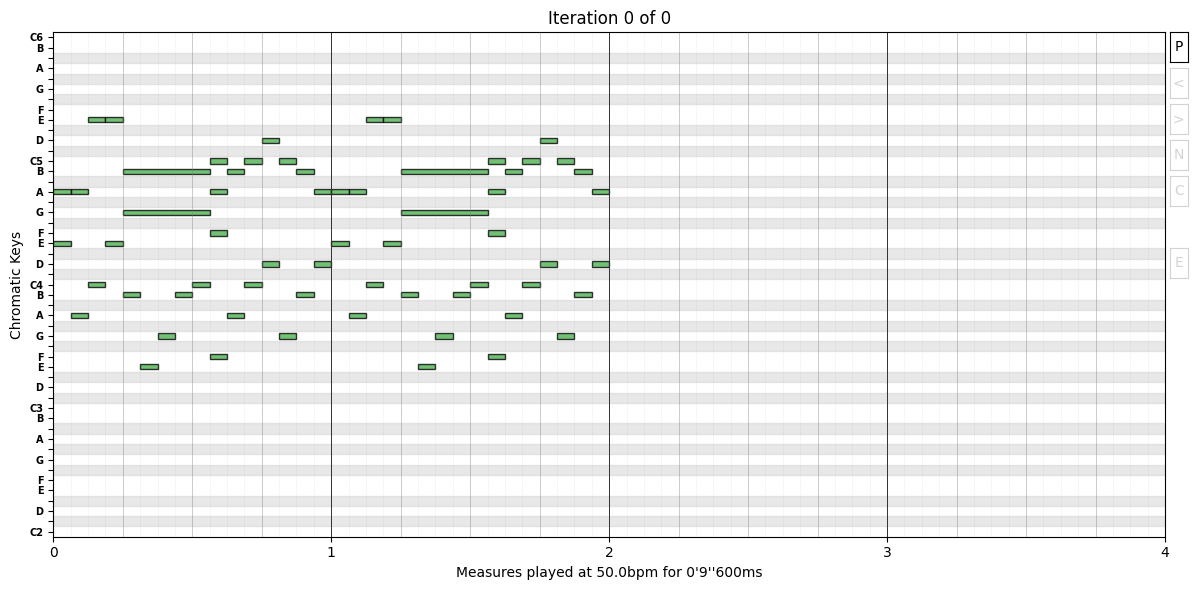

In [19]:
second_melody = new_melody + bass_melody * 2
second_melody << Velocity( bass_melody[Last()] ) >> Plot()

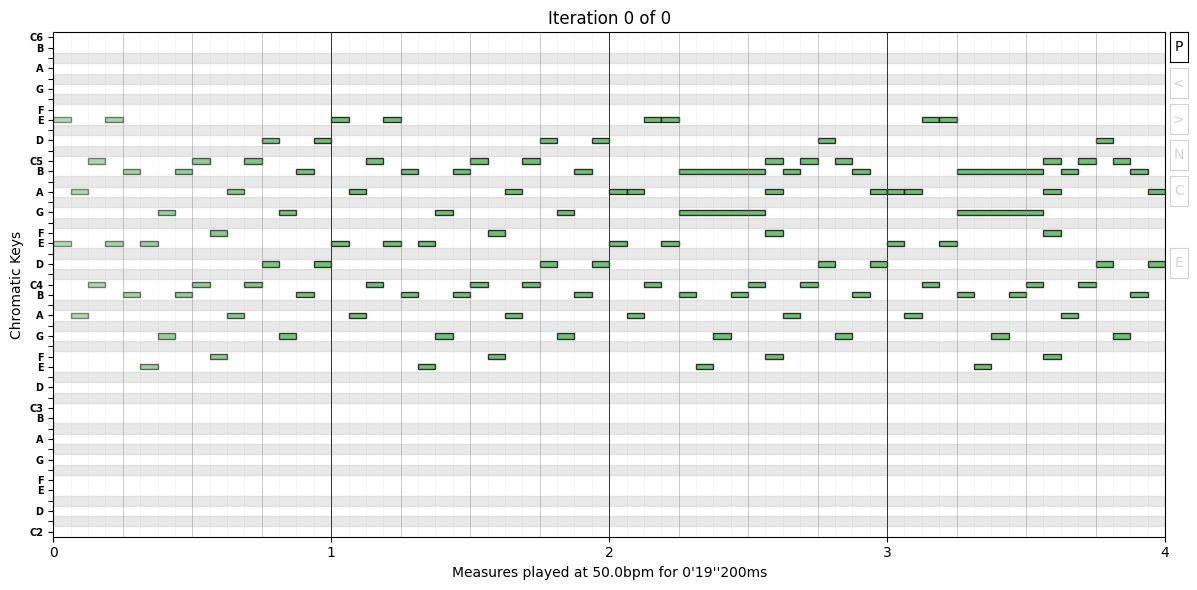

In [20]:
four_bars = first_melody * second_melody >> Plot()

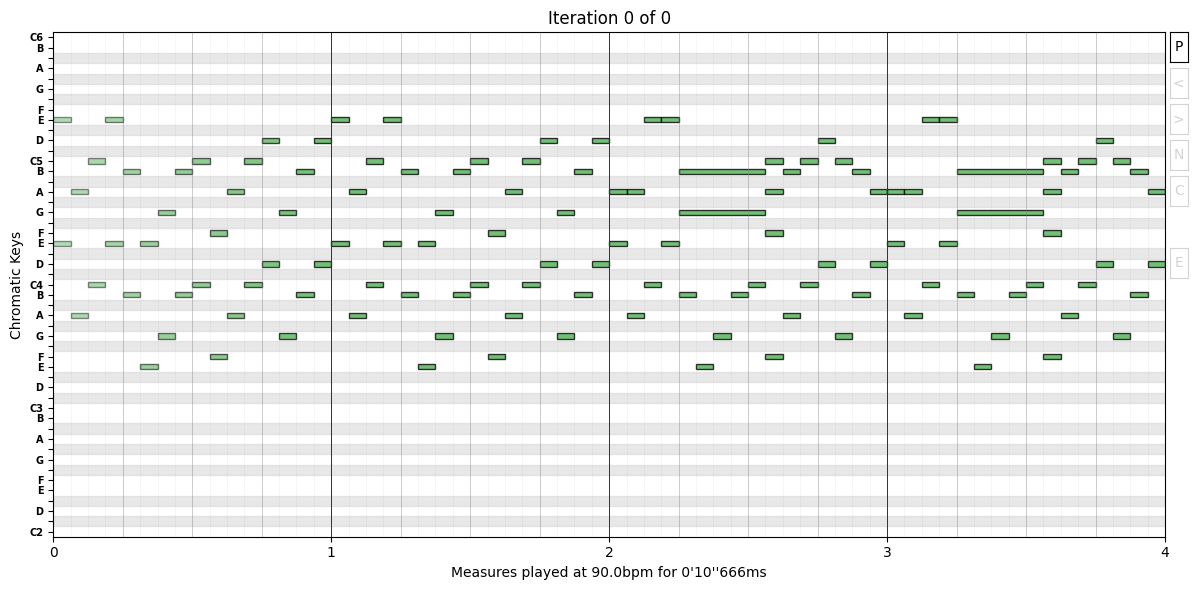

In [21]:
# Tempo is centralized in settings, so you can change the Tempo at any time like this
settings << Tempo(90)
four_bars >> Plot()

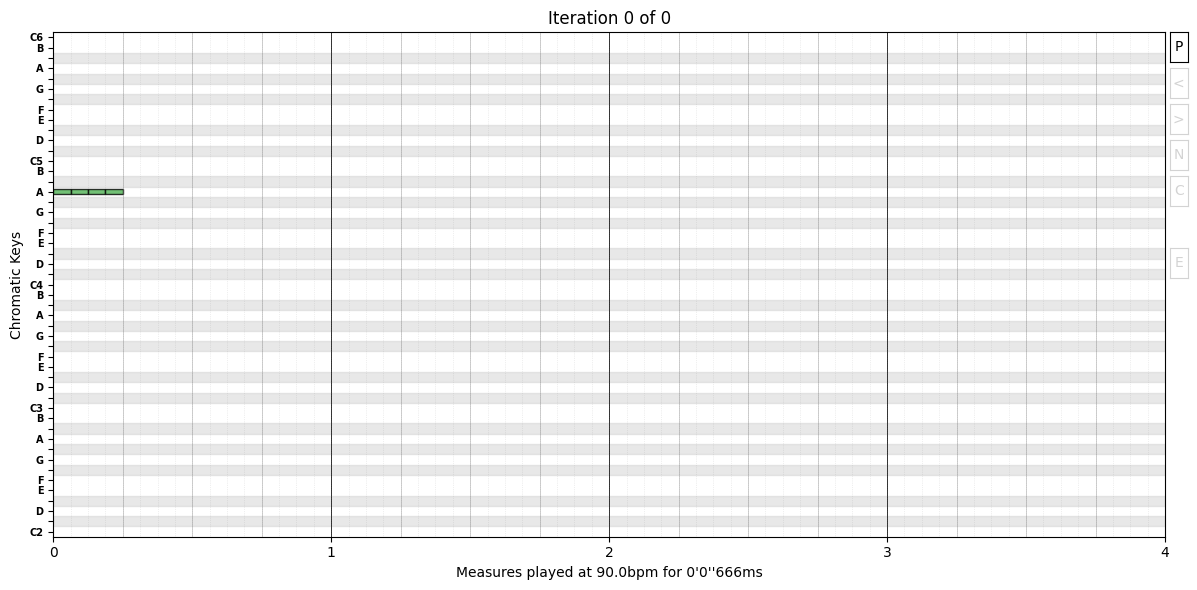

In [22]:
# This stack shall respect the Measure of the first `Element` (`Note`)
wrapped_notes = Note(1/16) / 4
wrapped_notes >> Plot()

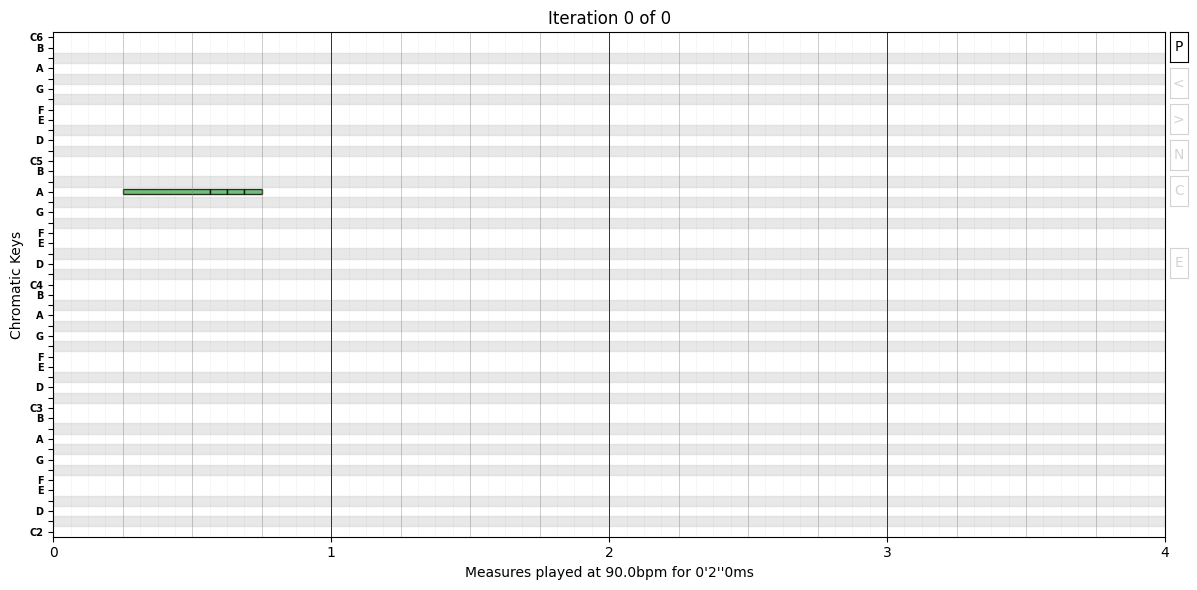

In [ ]:
wrapped_notes.mask() << First()**(1/4 + 1/16) >> Stack()
wrapped_notes.unmask().add(Beat(1))
wrapped_notes >> Plot()

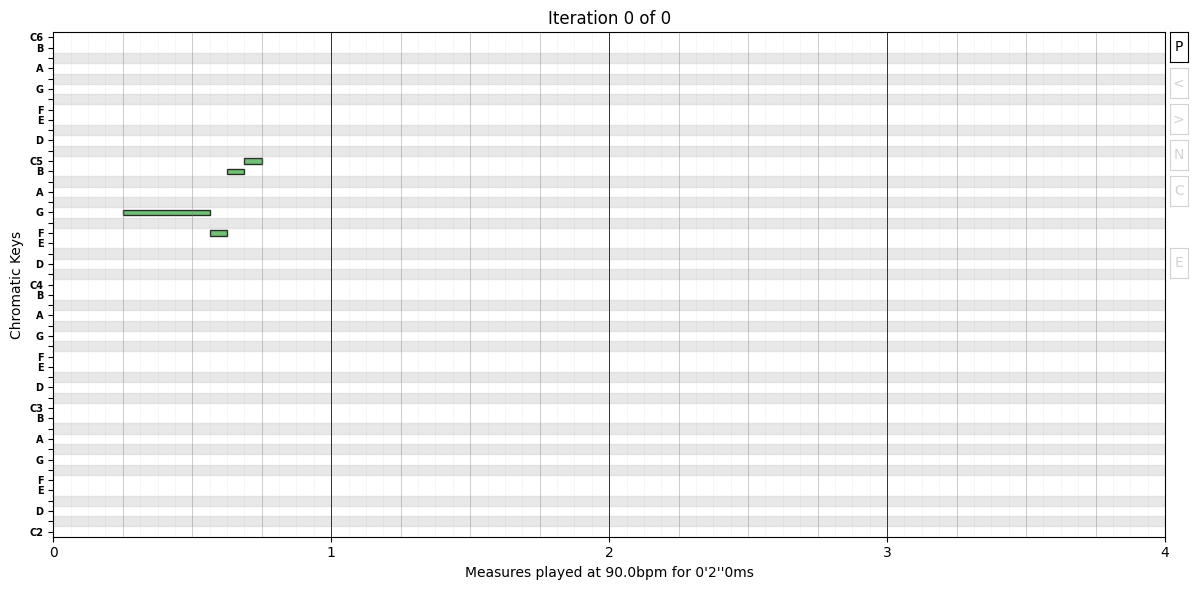

In [24]:
wrapped_notes += Foreach(-1, -2, +1, +2)**Degree()
wrapped_notes >> Plot()

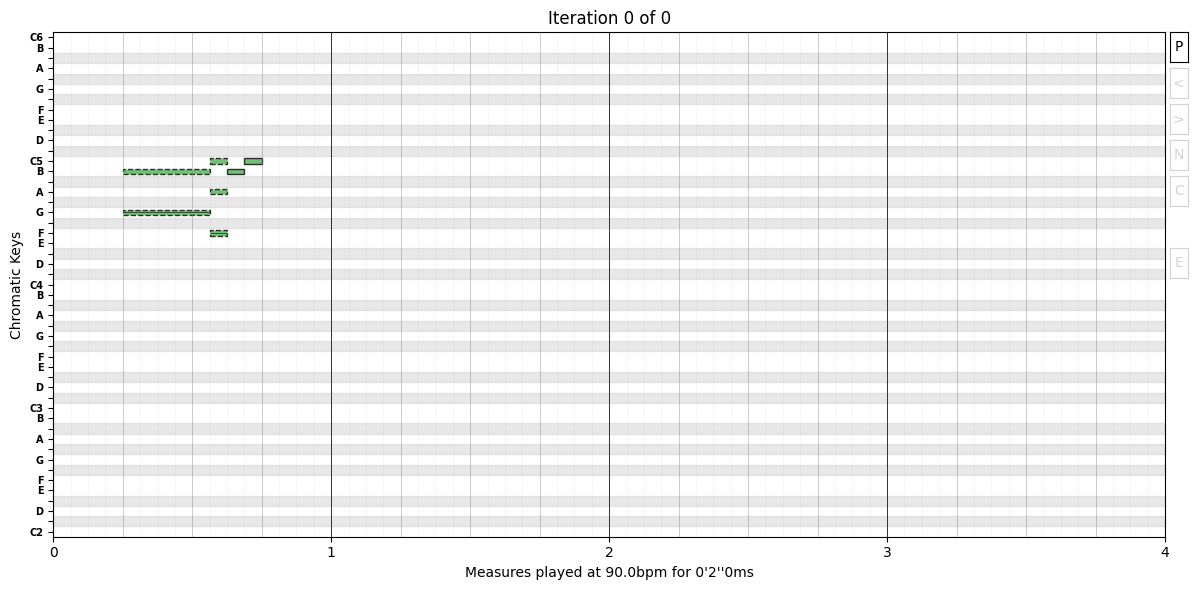

In [25]:
# As done before, we used the `/=` operator that resulted in a staking of Notes, however we can do a Wrapping
# and preserve the same number of Notes (a Cluster is derived from a Note), or Elements, `>>=` does exactly that,
# bellow each Note is wrapped by a Cluster and thus is still possible to refer to the 2nd Note as still the 2nd Note !
wrapped_notes[First()] >>= Cluster([0, 2.0])
wrapped_notes[Nth(2)] >>= Cluster([0, 2.0, 4.0])
wrapped_notes >> Plot()

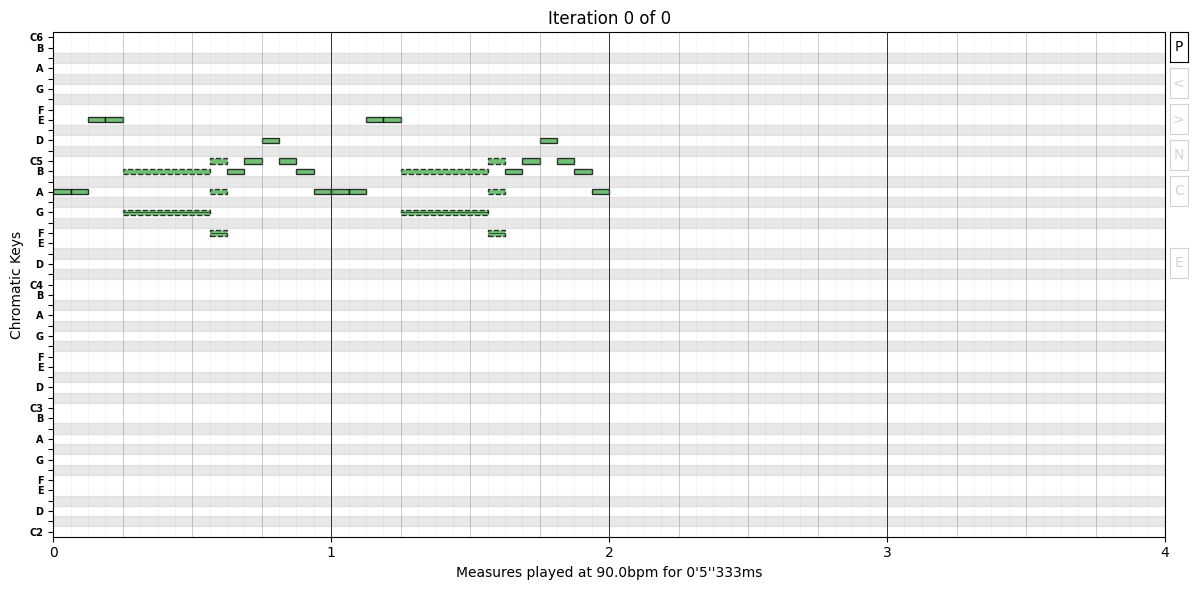

In [26]:
new_melody = outer_notes + wrapped_notes
new_melody *= 2
new_melody >> Plot()

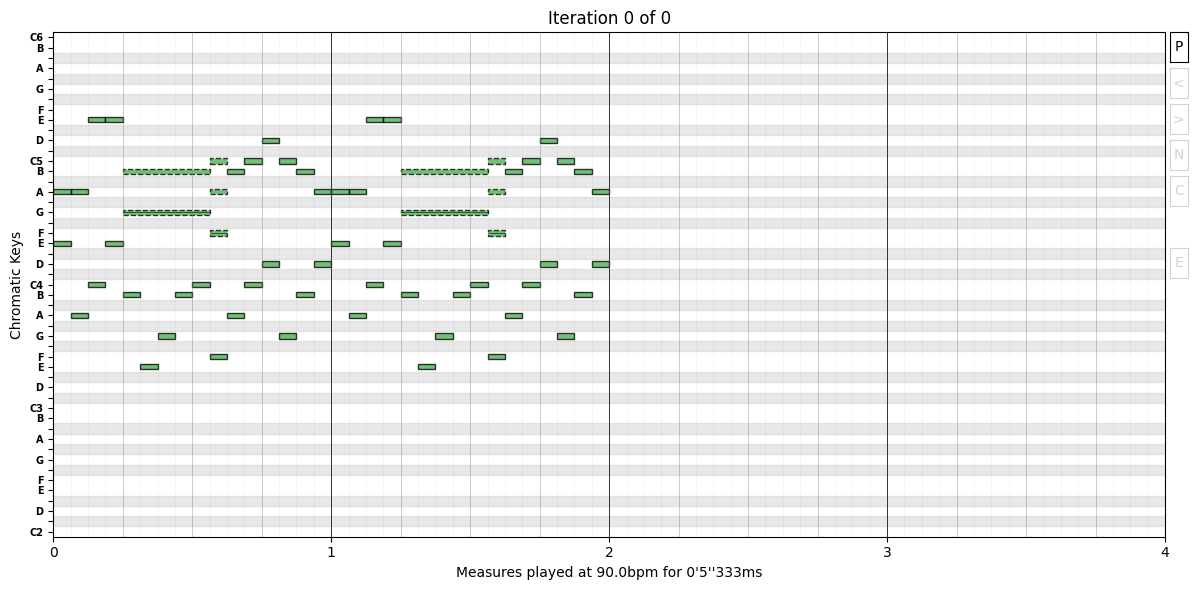

In [27]:
second_melody = new_melody + bass_melody * 2
second_melody << Velocity( bass_melody[Last()] ) >> Plot()

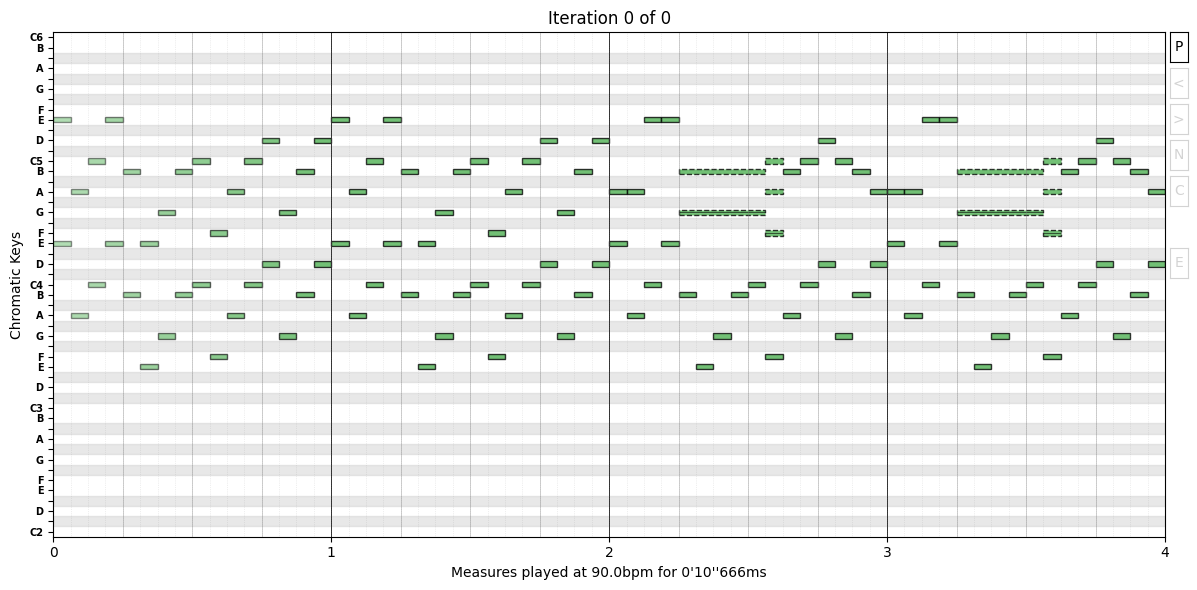

In [28]:
four_bars = first_melody * second_melody >> Plot()

In [29]:
four_bars * 4 >> Play()